In [1]:
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import os

import pdir

In [2]:
# Script inputs

FILE_PATH = "../orbsim/r4b_3d/ephemerides/"

# FILENAME_EARTH = "earth_2019-2020.csv"
FILENAME_EARTH = "earth_2019-2039.csv"
# FILENAME_EARTH = "earth_2019-2262.csv"

# FILENAME_MARS = "mars_2019-2020.csv"
FILENAME_MARS = "mars_2019-2039.csv"
# FILENAME_MARS = "mars_2019-2262.csv"

In [3]:
# Change CWD of necessary
cwd = os.getcwd()
in_correct_cwd = 'code' + FILE_PATH[2:-1] == cwd[-30:] # Check if last part of cwd is '/code/orbsim/r4b_3d'

if not in_correct_cwd:    
    os.chdir(FILE_PATH)
    cwd = os.getcwd()

print(cwd)

/Users/gandalf/Dropbox/repositories/letomes/code/orbsim/r4b_3d/ephemerides


In [41]:
# Read CSV files

earth = pd.read_csv(FILENAME_EARTH, parse_dates=['date'], index_col='days')
mars = pd.read_csv(FILENAME_MARS, parse_dates=['date'], index_col='days')

# earth = pd.read_csv(FILENAME_EARTH, parse_dates=['date'])
# mars = pd.read_csv(FILENAME_MARS, parse_dates=['date'])


pd.set_option("max_row", 20)
# pd.set_option("max_row", 500)

In [42]:
earth

,MJD,date,r,theta,phi,x,y,z
days,,,,,,,,
0.0,58484.0,2019-01-01,0.983311,66.939900,100.873526,-0.170672,0.888496,0.385160
1.0,58485.0,2019-01-02,0.983304,67.020209,101.977771,-0.187873,0.885562,0.383888
2.0,58486.0,2019-01-03,0.983301,67.108157,103.080725,-0.205017,0.882352,0.382497
3.0,58487.0,2019-01-04,0.983302,67.203702,104.182248,-0.222098,0.878866,0.380986
4.0,58488.0,2019-01-05,0.983307,67.306798,105.282199,-0.239109,0.875105,0.379357
5.0,58489.0,2019-01-06,0.983316,67.417396,106.380440,-0.256047,0.871070,0.377608
6.0,58490.0,2019-01-07,0.983329,67.535441,107.476837,-0.272904,0.866763,0.375742
7.0,58491.0,2019-01-08,0.983346,67.660876,108.571259,-0.289676,0.862184,0.373758
8.0,58492.0,2019-01-09,0.983366,67.793638,109.663582,-0.306356,0.857337,0.371657


In [38]:
mars

,days,MJD,date,r,theta,phi,x,y,z
0,0.0,58484.0,2019-01-01,1.453495,74.996659,39.051247,1.090280,0.884507,0.376274
1,1.0,58485.0,2019-01-02,1.454684,74.803063,39.609720,1.081506,0.895008,0.381327
2,2.0,58486.0,2019-01-03,1.455878,74.611161,40.168299,1.072627,0.905423,0.386344
3,3.0,58487.0,2019-01-04,1.457078,74.420966,40.726984,1.063645,0.915751,0.391324
4,4.0,58488.0,2019-01-05,1.458282,74.232493,41.285777,1.054562,0.925992,0.396266
5,5.0,58489.0,2019-01-06,1.459492,74.045756,41.844679,1.045378,0.936144,0.401170
6,6.0,58490.0,2019-01-07,1.460707,73.860769,42.403688,1.036095,0.946207,0.406036
7,7.0,58491.0,2019-01-08,1.461926,73.677545,42.962806,1.026713,0.956180,0.410864
8,8.0,58492.0,2019-01-09,1.463150,73.496099,43.522031,1.017234,0.966062,0.415653
9,9.0,58493.0,2019-01-10,1.464378,73.316441,44.081363,1.007659,0.975854,0.420402


Populating the interactive namespace from numpy and matplotlib


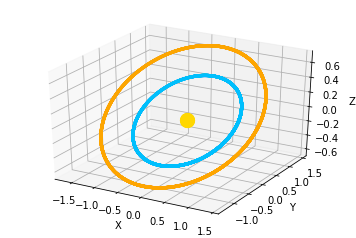

In [39]:
# Plot ephemerides

%pylab inline 
# %pylab qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# -- EARTH --
# x = earth['x'][::10]
# y = earth['y'][::10]
# z = earth['z'][::10]
x = earth['x']
y = earth['y']
z = earth['z']

ax.scatter(0, 0, 0, c='gold', marker='o', s=200)

# ax.plot3D(x, y, z, c='deepskyblue', marker='.')   # Plot dots + lines
ax.scatter(x, y, z, c='deepskyblue', marker='.')  # plot dots
# ax.plot(x,y,z, color='deepskyblue')               # plot lines

# -- MARS --
# x = mars['x'][::10]
# y = mars['y'][::10]
# z = mars['z'][::10]
x = mars['x']
y = mars['y']
z = mars['z']

ax.scatter(0, 0, 0, c='gold', marker='o', s=200)

# ax.plot3D(x, y, z, c='orange', marker='.')   # Plot dots + lines
ax.scatter(x, y, z, c='orange', marker='.')  # plot dots
# ax.plot(x,y,z, color='orange')               # plot lines


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [43]:
earth.index

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,
              ...
              7296.0, 7297.0, 7298.0, 7299.0, 7300.0, 7301.0, 7302.0, 7303.0,
              7304.0, 7305.0],
             dtype='float64', name='days', length=7306)

In [52]:
earth.loc[0]

MJD                    58484
date     2019-01-01 00:00:00
r                   0.983311
theta                66.9399
phi                  100.874
x                  -0.170672
y                   0.888496
z                    0.38516
Name: 0.0, dtype: object

In [59]:
earth.loc[0]['date']

Timestamp('2019-01-01 00:00:00')